In [7]:
import numpy as np
import math

import matplotlib.pyplot as plt

# Ex 1

In [8]:
# Dati
K = 2e-3 # cm/s
print('K =', K, 'cm/s')
# converto in m/giorno
K = round(2e-3 * 0.01 * 60 * 60 * 24, 1)
print('K =', K, 'm/giorno')

# Porosità efficace
P_e=26 # %
print('Porosità efficace =', P_e, '%')

# Spessore acquifero
L = 30 # m

# Distanza tra i due pozzi
d = 180 # m

# Livello piezometrico pozzo 1
h1 = 150 # m
# Soggiacenza pozzo 1
z1 = 10 # m

# Livello piezometrico pozzo 2
h2 = 150 # m
# Soggiacenza pozzo 2
z2 = 13 # m


K = 0.002 cm/s
K = 1.7 m/giorno
Porosità efficace = 26 %


 - Calcolare la portata in m^3/giorno
 - Calcoalre la velocità darcina e reale
 - La quota piezometrica a metà tra i due pozzi

We had that saturated thickness is the portion of the aquifer that is filled with water, and we know that moving in the x direction the head is changing!

So we need the mean saturated thickness, that is the average of the saturated thickness between the two wells.

In [9]:
# average saturated thickness
hl_1 = L - z1
hl_2 = L - z2
h = int(((hl_1)+(hl_2)) / 2) +1
print('h =', h, 'm')

h = 19 m


The gradients is the difference between the head in the two wells divided by the distance between the two wells.

In [10]:
# gradiente idraulico
i = round(((h1-z1)-(h2-z2))/d, 3)
print('i =', i)

i = 0.017


In [11]:
print('K =', K, 'm/giorno')
print('h =', h, 'm')
print('i =', i)


K = 1.7 m/giorno
h = 19 m
i = 0.017


In [13]:
# Calcolo della portata tramite eqauzione di Darcy
q_darcy = round(K * i * h, 2)
print('q =', q_darcy, 'm^2/giorno')

q = 0.55 m^2/giorno


Now is time to calculate the darcian velocity, that is the velocity of the water in the aquifer.

That is:
 - q = k * i

In [14]:
print('K =', K, 'm/giorno')
print('i =', i)


K = 1.7 m/giorno
i = 0.017


In [15]:
# darcy velocity
q = round(K * i, 3)
print('q =', q, 'm/giorno')

q = 0.029 m/giorno


Now is time to calculate the piezometric head in the middle of the two wells.
 - h_x = sqrt(h_1^2 - (h_1^2 - h_2^2)x/L)

In [16]:
# median x
d_2 = int(d/2)
print('d/2 =', d_2, 'm') 

# piezometric head at the middle of the two wells
h_x = int(math.sqrt(math.pow(hl_1,2) - (( (math.pow(hl_1,2) - math.pow(hl_2,2)) * d_2) / d ) )) + 1
print('h_x =', h_x, 'm')

d/2 = 90 m
h_x = 19 m


Now it's time to calculate the dupuit velocity, that is the velocity of the water in the aquifer. unitary velocity is the velocity of the water in the aquifer.

In [47]:
# euqation of Dupuit
q_dupuit = round(K/2 * ( (math.pow(hl_1,2) - math.pow(hl_2,2)) / d ), 2)
print('q =', q, 'm^2/giorno')

q = 0.52 m^2/giorno


In [89]:
# Scarto percentuale tra le due portate
scarto = round((q_darcy - q_dupuit)/q_darcy * 100, 2)
print('Scarto =', scarto, '%')

Scarto = 5.45 %


plot the difference between the darcian and dupuit velocity

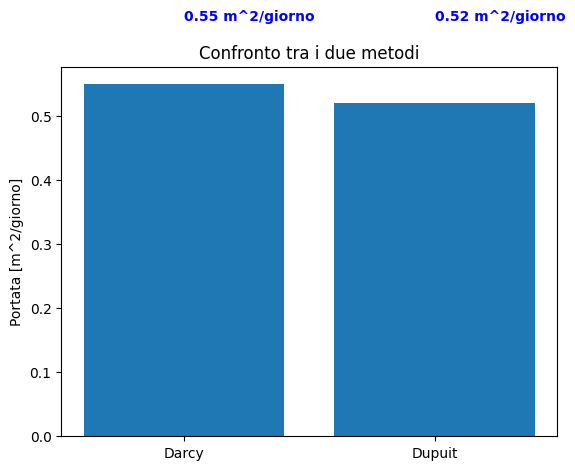

In [62]:
# plot the results of the two methods with barplot
x = np.arange(2)
fig, ax = plt.subplots()
ax.bar(x, [q_darcy, q_dupuit])
ax.set_xticks(x)
ax.set_xticklabels(['Darcy', 'Dupuit'])
ax.set_ylabel('Portata [m^2/giorno]')
ax.set_title('Confronto tra i due metodi')

# add the value of the two methods at the top of the bar at the same height
max_value = max(q_darcy, q_dupuit)
ax.text(0, max_value + 0.1, str(q_darcy) + " m^2/giorno", color='blue', fontweight='bold')
ax.text(1, max_value + 0.1, str(q_dupuit)+ " m^2/giorno", color='blue', fontweight='bold')

plt.show()




# Ex 2

In [25]:
K = 1.4e-3 # m/s
# convert in m/giorno
K = round(1.4e-3 * 60 * 60 * 24 * 0.01, 1)
print('K =', K, 'm/giorno')

# Spessore acquifero
b = 30 # m
# larghezza acquifero
L = 8000 # m

# livello piezometrico pozzi s.l.m.
h1_slm, h2_slm = 100, 100 # m

# Distanza tra i due pozzi
d = 1500 # m

# livello misura pozzo 1
h1 = 3 # m

# livello misura pozzo 2
h2 = 11 # m


K = 1.2 m/giorno


Calcolare:
 - La portata in m^3/giorno
 - Se si potesse perforare un pozzo profondo 25 m a metà tra i due pozzi, che livello di acqua si avrebbe?

In [26]:
i = round(((h1_slm - h1) - (h2_slm - h2)) / d, 3)
print('i =', i)

i = 0.005


In [27]:
# Sicuramente possiamo calcolara la portata totale
Q = K * b * L * i
print('Q =', Q, 'm^3/giorno')


Q = 1440.0 m^3/giorno


In [29]:
# portata unitaria
q = K * b * i
print('q =', q, 'm^2/giorno')

q = 0.18 m^2/giorno


In [71]:
# portata specifica
q_s = K * i
print('q_s =', q_s, 'm/giorno')

q_s = 0.006 m/giorno


Se si perforasse un pozzo profondo 25 m a metà tra i due pozzi, che livello di acqua si avrebbe?

In [73]:
d_2 = int(d/2)
print('d/2 =', d_2, 'm')

d/2 = 750 m


In [78]:
h_x = h1_slm - (h1_slm - h1 - ( i * d_2 ))
print('h_x =', h_x, 'm')

h_x = 6.75 m


Text(0.5, 1.0, 'Livello piezometrico nei 3 pozzi')

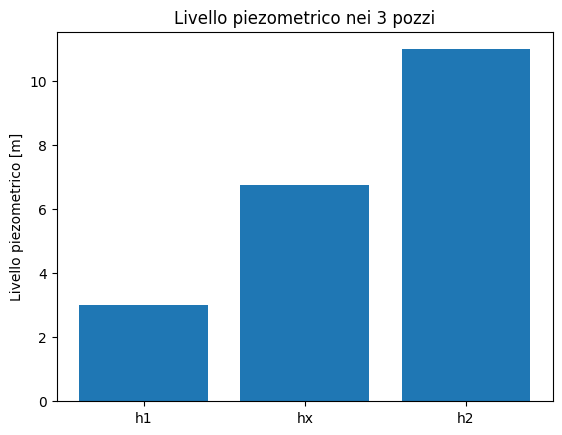

In [86]:
# plot the 3 points
x = np.arange(3)
fig, ax = plt.subplots()
ax.bar(x, [h1, h_x, h2])
ax.set_xticks(x)
ax.set_xticklabels(['h1', 'hx', 'h2'])
ax.set_ylabel('Livello piezometrico [m]')
ax.set_title('Livello piezometrico nei 3 pozzi') 
